# CS 109B Advanced Topics in Data Science, Final Project, Milestone 2

## Group 9 - Steve Robbins, Chad Tsang, and Ted Heuer
**Harvard University**<br>
**Spring 2017**<br>
**Due Date: ** Wednesday, April 12th, 2017 at 11:59pm

## Milestone 2: Assembling training data, due Wednesday, April 12, 2017

We are aware that you have little time this week, due to the midterm. So this milestone is a bit easier to achieve than the others. The goal for this week is to prepare the data for the modeling phase of the project. You should end up with a typical data setup of training data X and data labels Y.

The exact form of X and Y depends on the ideas you had previously. In general though Y should involve the genre of a movie, and X the features you want to include to predict the genre. Remember from the lecture that more features does not necessarily equal better prediction performance. Use your application knowledge and the insight you gathered from your genre pair analysis and additional EDA to design Y. Do you want to include all genres? Are there genres that you assume to be easier to separate than others? Are there genres that could be grouped together? There is no one right answer here. We are looking for your insight, so be sure to describe your decision process in your notebook. 

In preparation for the deep learning part we strongly encourage you to have two sets of training data X, one with the metadata and one with the movie posters. Make sure to have a common key, like the movie ID, to be able to link the two sets together. Also be mindful of the data rate when you obtain the posters. Time your requests and choose which poster resolution you need. In most cases w500 should be sufficient, and probably a lower resolution will be fine.

The notebook to submit this week should at least include:

- Discussion about the imbalanced nature of the data and how you want to address it
- Description of your data
- What does your choice of Y look like?
- Which features do you choose for X and why? 
- How do you sample your data, how many samples, and why?

*Important*: You do not need to upload the data itself to Canvas.

### Solution

For this project, to date we have extracted the raw data of 20 years of movies (1997 to 2016) from TMDB which have received over 25 votes.  The information extracted and derived is described below, organized by source and anticipated usage.  *Note that if time permits, we may elect to include additional features from alternative sources to potentially attempt to improve classification performance.*

**Metadata Extracted from TMDB (*No Anticipated Predictive Value - Not included in the models*)**
- TMDB_Genres:  The original set of TMDB genres associated to this movie.  As the response value is derived from this set, this will not be used as a predictor.
- TMDB_Id:  The unique TMDB identifier, used for reference and data acquisition, without any anticipated predictive capability.
- IMDB_Id:  The unique IMDB identifier, used for reference and data acquisition, without any anticipated predictive capability.
- Original_Title:  The original title of the movie, used for display purposes.

**Metadata Extracted from TMDB (*Anticipated Predictive Value - Included in the models*)**
- Belongs_to_collection:  Indicator of whether the movie is part of a collection, trilogy, and so forth.
- Budget:  The budget of the movie, which is envisioned to have predictive value.
- Original_Language:  The original language of the movie, likely to have predictive strength if the dataset included more "Foreign" samples.
- Overview:  The short, narrative plot summary, which could have predictive capability when reduced and NLP applied.
- Popularity:  The popularity rating of the movie on TMDB, which may have predictive capability.
- Poster_Path:  The remote poster filename, when combined with the base path and image size can be used to retrieve the poster image from TMDB.  This is also used as a key to the local copy of the poster image.
- Production_Companies:  The production company(-ies) which released the movie; which is expected to have predictive value.
- Release_Date_Month:  The month of release of the movie.  As movies of similar genres may be released during certain times of the year (such as Action in the Summer month) may have predictive strength.
- Release_Date_Year:  The year of release of the movie.  As genres ebb/flow over the years may have predictive strength when denormalized from the Release Date into year.
- Revenue:  The revenue the movie produced in release.
- Runtime:  The runtime in minutes of the movie.  It is expected certain abnormal runtimes may inform the genre, such as long runtimes perhaps indicating a dramatic movie, and shorter being correlated to comedy or animation.
- Title:  The title of the movie, generally in English, both for display purposes and if the length of the title tends to correlate to certain genres.
- Vote_Average:  The user contributed rating of the movie.
- Vote_Count:  The number of user votes for the movie.

**Poster Images:**

- The locally cached jpg images of the TMDB-identified poster (which may be different from the IMDB version) with size "w500", stored by filename from "Poster Path" in the TMDB attribute.

**Derived Data:**
- Reduced_Genre:  The reduced/simplified class to which we have elected to map the movie, namely the response category to be elaborated next.
- Movie Poster Principal Components : The poster images will be converted to greyscale from color then have dimensionality reduction performed via PCA then images mapped to the 90% variance explained PCA components as predictors.
- Overview Text Bag of Words Principal Components:  The overview narrative description will be converted to a vector of the corpus then have dimensionality reduction performed via PCA with the overview mapped to the 90% variance explained PCA components as predictors.

**Choice of Response Value:**

The desired response variable is a reflection of the genre of the movie.  Unfortunately, the data as obtained from TMDB has one to four different genres assigned to each movie.  Concatenating the genres together without modification would result in a very significant number of classes (thousands of potential classes), more than would be practical given the quantity of data available and the time constraints of the project.  As such, we have explored a few techniques to reduce the number of genres suitable for this project.  

Our first approach reduced the movies by the first genre listed, which resulted in twenty classes.  This reduction seemed a bit simplistic, so we chose to examine the genre correlations and apply heuristics to the data.  The infrequent genres were manually mapped to more common where it made intuitive sense, and correlations of the genres were examined to effectively creating a reduced number of classes, 149.  The resultant classes do include the general categories and specifics, such as "Action" and "Crime/Action", but every movie is uniquely mapped to a single class of genre tuples.  Approximately 107 of the 149 classes (72%) have very low frequencies (8% of the data) can be categorized as "Other". 

As such, we have created a synthetic response variable/class derived from the existing genre data and heuristics, denoted "Reduce_genre" above.

**Imbalanced nature of the data**

Unfortunately, even with this normalization the response classes are highly imbalanced, resulting in 23 of the 149 reduced classes representing over 80% of the total 8,060 movies extracted, with the drama class in particular dominating with 829 (10.2%) of the 8060 movies.

![Movie genre header](ReducedClasses.png)

This would further be exacerbated by reduction to a single TMDB genre, with 3658 (45.3%) observations having drama as a listed genre.

![Movie genre header](MoviesByGenre.png)

**Sampling, Sampling Technique and Sample Size**

We intend on addressing the class imbalance using two techniques, namely categorizing all of the extremely low frequency classes into an "Other" category as explained above, and employing stratified sampling with class weights.  

There are a number of sampling techniques that were considered.  The simplest approach is a random sample, however due to the imbalanced nature of the data would likely focus on the few dominant classes disregarding the minority classes.  We have considered oversampling the data which would repeatedly sample the minority classes to equalize class imbalance, undersampling which would effectively ignore some data in the majority classes, synthetic data generation which was dismissed as it would be intuitively difficult to generate, and stratified sampling with class weights.  

Stratified sampling preserves the class structure when performing sampling, by sampling a number of observations relative to the overall class proportion from the distinct classes, namely with the assigned genres forming the strata.  As such, any sample of the data will maintain the relative class frequencies present in the original, complete dataset.  Additionally, the class proportions (weights) are known from the overall dataset (and honored in the sample) and thus can be used to adjust for the imbalance of the classes with machine learning algorithms.

Sample size will be chosen to be as large as computationally tractable for the purpose; for example during development we may find it convenient to work with a representative subset of the data, the generation of the PCA rotation matrix can be resource intensive, and cross-validation techniques rely upon sampling.

-----------------------------------

*Supporting Code and Analysis Below*

### Install Packages

In [1]:
#!pip install IMDbPY
#(only supported in Python 2)
# Documentation for IMDb library:  
        # http://imdbpy.sourceforge.net/support.html#documentation
        # http://imdbpy.sourceforge.net/docs/README.package.txt

In [2]:
#!pip install tmdbsimple
# Documentation for TMDb library
        # https://github.com/celiao/tmdbsimple/
        # (good resource) https://developers.themoviedb.org/3/discover/movie-discover

In [1]:
from IPython.display import Image
import urllib

from imdb import IMDb
import tmdbsimple as tmdb
tmdb.API_KEY = 'c5d41f08e55fca6e9f5fc0b6d1735540'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors
from pandas.tools.plotting import scatter_matrix

### TMDb Genres

In [3]:
num_genres = len(tmdb.Genres().list()['genres'])

idx = range(0, num_genres)
cols = ['genre_id', 'genre']

tmdb_genre_df = pd.DataFrame(index=idx, columns=cols)

In [4]:
for i in range(0, num_genres):
    tmdb_genre_df['genre_id'][i] = tmdb.Genres().list()['genres'][i].values()[0]
    tmdb_genre_df['genre'][i] = tmdb.Genres().list()['genres'][i].values()[1]

In [5]:
foreign_df = pd.DataFrame([[10769, 'Foreign']], columns=cols) #add Foreign Movies (old genre that no longer exists)

tmdb_genre_df = tmdb_genre_df.append(foreign_df, ignore_index=True)

In [6]:
tmdb_genre_df

,genre_id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


### Get Genre Listings for Large Sample of Movies

In [7]:
discover = tmdb.Discover()

In [8]:
def movie_genres_list(year, min_votes):
        
    movies_in_year = discover.movie(primary_release_year=year, vote_count_gte=min_votes)
    max_page = (movies_in_year['total_pages'] - 1)
    movies_per_page = 20 #always 20 entries per page

    idx = range(0, max_page * movies_per_page)
    cols = ['movie_id', 'num_genres', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 
            'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11']

    movies_genres_table = pd.DataFrame(index=idx, columns=cols)
    
    for i in range(0, max_page):
        movies_page = discover.movie(page=(i+1), primary_release_year=year, vote_count_gte=min_votes, sort_by='vote_count.desc')

        for j in range(0, movies_per_page):
            genre_list = movies_page['results'][j]['genre_ids']
            row_num = i * movies_per_page + j
            movies_genres_table.iloc[row_num, 0] = movies_page['results'][j]['id']
            movies_genres_table.iloc[row_num, 1] = len(genre_list)

            for k in range(0, len(genre_list)):
                movies_genres_table.loc[row_num][k+2] = genre_list[k]
                
    return movies_genres_table

In [9]:
min_votes=25

##### Converted Section BELOW to MARKDOWN (from here)

movies_2016 = movie_genres_list(year=2016, min_votes=min_votes)

movies_2015 = movie_genres_list(year=2015, min_votes=min_votes)

movies_2014 = movie_genres_list(year=2014, min_votes=min_votes)

movies_2013 = movie_genres_list(year=2013, min_votes=min_votes)

movies_2012 = movie_genres_list(year=2012, min_votes=min_votes)

movies_2011 = movie_genres_list(year=2011, min_votes=min_votes)

movies_2010 = movie_genres_list(year=2010, min_votes=min_votes)

movies_2009 = movie_genres_list(year=2009, min_votes=min_votes)

movies_2008 = movie_genres_list(year=2008, min_votes=min_votes)

movies_2007 = movie_genres_list(year=2007, min_votes=min_votes)

movies_2006 = movie_genres_list(year=2006, min_votes=min_votes)

movies_2005 = movie_genres_list(year=2005, min_votes=min_votes)

movies_2004 = movie_genres_list(year=2004, min_votes=min_votes)

movies_2003 = movie_genres_list(year=2003, min_votes=min_votes)

movies_2002 = movie_genres_list(year=2002, min_votes=min_votes)

movies_2001 = movie_genres_list(year=2001, min_votes=min_votes)

movies_2000 = movie_genres_list(year=2000, min_votes=min_votes)

movies_1999 = movie_genres_list(year=1999, min_votes=min_votes)

movies_1998 = movie_genres_list(year=1998, min_votes=min_votes)

movies_1997 = movie_genres_list(year=1997, min_votes=min_votes)

movies_genres_raw_TMDb = pd.concat([movies_2016, movies_2015, movies_2014, movies_2013, movies_2012, movies_2011, 
                                   movies_2010, movies_2009, movies_2008, movies_2007, movies_2006, movies_2005, 
                                   movies_2004, movies_2003, movies_2002, movies_2001, movies_2000, movies_1999, 
                                   movies_1998, movies_1997])

movies_genres_raw_TMDb.iloc[:10, :]

movies_genres_raw_TMDb.shape

### Write and Read Raw TMDb Genres File Locally

movies_genres_raw_TMDb = movies_genres_raw_TMDb.fillna(0)
movies_genres_raw_TMDb.iloc[:10, :]

movies_genres_raw_TMDb.to_csv('movies_genres_raw_TMDb', index=False)

##### Converted Section ABOVE to MARKDOWN (to here)

In [63]:
movies_genres_table = pd.read_csv('movies_genres_raw_TMDb.csv')
print movies_genres_table.shape
movies_genres_table.iloc[:10, :]

(8060, 13)


,movie_id,num_genres,id_1,id_2,id_3,id_4,id_5,id_6,id_7,id_8,id_9,id_10,id_11
0,293660,4,28,12,35,10749,0,0,0,0,0,0,0
1,297761,4,28,80,14,878,0,0,0,0,0,0,0
2,209112,3,28,12,14,0,0,0,0,0,0,0,0
3,271110,3,12,28,878,0,0,0,0,0,0,0,0
4,329865,4,53,18,878,9648,0,0,0,0,0,0,0
5,284052,4,28,12,14,878,0,0,0,0,0,0,0
6,246655,4,28,12,14,878,0,0,0,0,0,0,0
7,269149,4,16,12,10751,35,0,0,0,0,0,0,0
8,259316,3,12,28,14,0,0,0,0,0,0,0,0
9,330459,4,28,18,878,10752,0,0,0,0,0,0,0


### Create Table Showing How Genres Relate to Eachother

In [11]:
def create_genre_pairs(tmdb_genre_df, movies_genres_table):

    idx = tmdb_genre_df['genre_id']
    cols = tmdb_genre_df['genre_id']

    genre_pairs_table = pd.DataFrame(index=idx, columns=cols)
    genre_pairs_table = genre_pairs_table.fillna(0)

    total_movies = len(movies_genres_table)

    for row_num in range(0, total_movies):

        num_genres = movies_genres_table.iloc[row_num, 1]

        for i in range(0, num_genres):

            for j in range(0, num_genres):

                x = movies_genres_table.iloc[row_num, i+2]
                y = movies_genres_table.iloc[row_num, j+2]
                genre_pairs_table.loc[x, y] = genre_pairs_table.loc[x, y] + 1

    genre_pairs_table_names = genre_pairs_table.copy()

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    genre_pairs_table_names.columns = new_cols
    genre_pairs_table_names = genre_pairs_table_names.set_index(new_idx)

    return genre_pairs_table_names

In [12]:
genre_pairs = create_genre_pairs(tmdb_genre_df, movies_genres_table)

In [13]:
genre_pairs

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign
genre,,,,,,,,,,,,,,,,,,,,
Action,1760,590,150,371,438,7,534,90,232,78,166,8,92,87,421,7,784,65,26,5
Adventure,590,1060,236,317,67,7,251,298,305,42,47,9,41,75,250,20,227,27,22,2
Animation,150,236,632,224,9,5,63,365,166,1,13,19,15,26,121,8,24,1,3,1
Comedy,371,317,224,2858,250,20,938,410,224,16,140,109,52,690,144,40,173,9,17,6
Crime,438,67,9,250,1042,9,596,7,15,15,63,10,174,54,23,5,635,6,9,1
Documentary,7,7,5,20,9,314,24,11,1,13,3,36,1,0,1,2,4,8,0,3
Drama,534,251,63,938,596,24,3658,134,186,222,206,130,288,841,171,47,969,148,29,17
Family,90,298,365,410,7,11,134,747,210,2,3,34,10,70,75,45,11,0,2,2
Fantasy,232,305,166,224,15,1,186,210,687,3,87,13,53,93,156,18,110,3,3,0


### Total Number of Genre Listings for All Movies

In [14]:
def get_genre_totals(tmdb_genre_df, genre_pairs):

    idx = tmdb_genre_df['genre']
    cols = ['num_movies_with_genre']

    genre_totals = pd.DataFrame(index=idx, columns=cols)

    for i in range(0, len(genre_totals)):
        genre_totals.iloc[i,0] = genre_pairs.ix[tmdb_genre_df['genre'][i], tmdb_genre_df['genre'][i]]
        
    return genre_totals

In [68]:
genre_totals = get_genre_totals(tmdb_genre_df, genre_pairs)
genre_totals.to_csv('genre_totals.csv', index=True)
genre_totals

,num_movies_with_genre
genre,
Action,1760
Adventure,1060
Animation,632
Comedy,2858
Crime,1042
Documentary,314
Drama,3658
Family,747
Fantasy,687


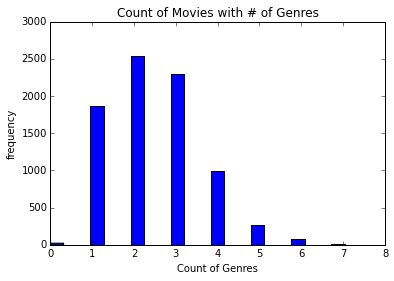

In [16]:
plt.hist(movies_genres_table['num_genres'].values, 
     25)
plt.title('Count of Movies with # of Genres')
plt.xlabel('Count of Genres')
plt.ylabel('frequency')

*Check that Genre Totals Match*

In [17]:
sum(genre_totals.iloc[:, 0])

19611

In [18]:
sum(movies_genres_table.loc[:,'num_genres'])

19611

### Create Heat Map of Genre Relationships

In [19]:
def norm_genre_pairs(tmdb_genre_df, genre_pairs, genre_totals):

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    #set the same x/y axis genre to 0 
    genre_pairs_plot = genre_pairs.copy()

    for idx in new_idx:
        genre_pairs_plot.set_value(idx, idx, 0)

    norm_genre_pairs_plot = genre_pairs_plot.copy()

    for j in range(0, len(genre_totals)):
        for i in range(0, len(genre_totals)):
            norm_genre_pairs_plot.iloc[i, j] = float(genre_pairs_plot.iloc[i, j]) / int(genre_totals.iloc[j])

    return norm_genre_pairs_plot

In [20]:
norm_genre_pairs_plot = norm_genre_pairs(tmdb_genre_df, genre_pairs, genre_totals)
norm_genre_pairs_plot

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign
genre,,,,,,,,,,,,,,,,,,,,
Action,0.000000,0.556604,0.237342,0.129811,0.420345,0.022293,0.145981,0.120482,0.337700,0.302326,0.150772,0.033898,0.155143,0.069767,0.510922,0.068627,0.355394,0.340314,0.371429,0.20
Adventure,0.335227,0.000000,0.373418,0.110917,0.064299,0.022293,0.068617,0.398929,0.443959,0.162791,0.042688,0.038136,0.069140,0.060144,0.303398,0.196078,0.102901,0.141361,0.314286,0.08
Animation,0.085227,0.222642,0.000000,0.078376,0.008637,0.015924,0.017223,0.488621,0.241630,0.003876,0.011807,0.080508,0.025295,0.020850,0.146845,0.078431,0.010879,0.005236,0.042857,0.04
Comedy,0.210795,0.299057,0.354430,0.000000,0.239923,0.063694,0.256424,0.548862,0.326055,0.062016,0.127157,0.461864,0.087690,0.553328,0.174757,0.392157,0.078422,0.047120,0.242857,0.24
Crime,0.248864,0.063208,0.014241,0.087474,0.000000,0.028662,0.162931,0.009371,0.021834,0.058140,0.057221,0.042373,0.293423,0.043304,0.027913,0.049020,0.287851,0.031414,0.128571,0.04
Documentary,0.003977,0.006604,0.007911,0.006998,0.008637,0.000000,0.006561,0.014726,0.001456,0.050388,0.002725,0.152542,0.001686,0.000000,0.001214,0.019608,0.001813,0.041885,0.000000,0.12
Drama,0.303409,0.236792,0.099684,0.328202,0.571977,0.076433,0.000000,0.179384,0.270742,0.860465,0.187103,0.550847,0.485666,0.674419,0.207524,0.460784,0.439257,0.774869,0.414286,0.68
Family,0.051136,0.281132,0.577532,0.143457,0.006718,0.035032,0.036632,0.000000,0.305677,0.007752,0.002725,0.144068,0.016863,0.056135,0.091019,0.441176,0.004986,0.000000,0.028571,0.08
Fantasy,0.131818,0.287736,0.262658,0.078376,0.014395,0.003185,0.050847,0.281124,0.000000,0.011628,0.079019,0.055085,0.089376,0.074579,0.189320,0.176471,0.049864,0.015707,0.042857,0.00


In [21]:
def plot_heat_map(tmdb_genre_df, norm_genre_pairs_plot):

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    data = norm_genre_pairs_plot
    fig, ax = plt.subplots(figsize = (12,12))
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor = False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels(new_idx, minor=False, fontsize=7)
    ax.set_yticklabels(new_cols, minor=False, fontsize=7)

    plt.ylabel('...Likelihood of ______ also Listed as Genre', fontsize=20)
    plt.title('If ______ Listed as a Genre...',
             horizontalalignment='center',
             fontsize=20,
             y = 1.04)

    plt.show()

/Users/ted/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


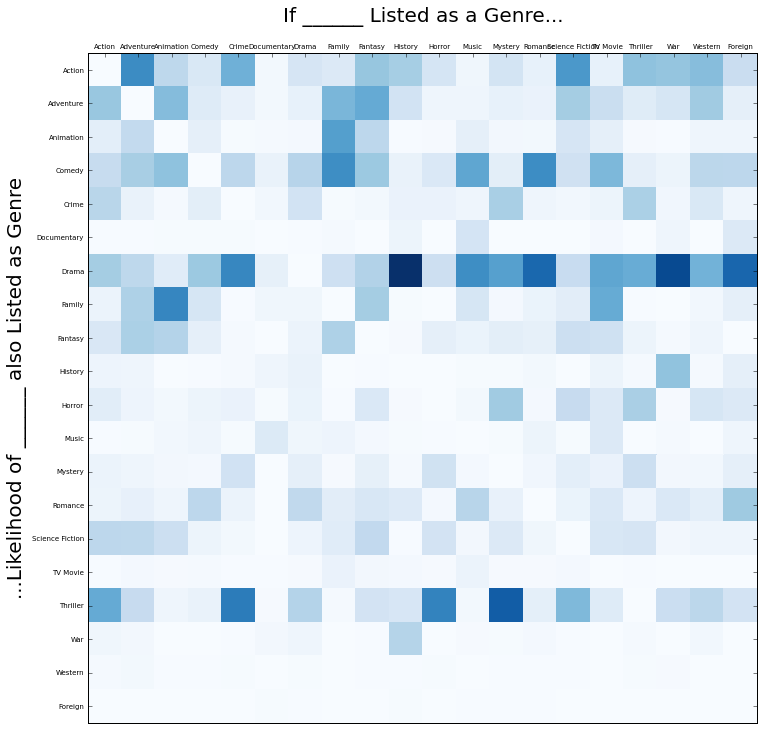

In [22]:
plot_heat_map(tmdb_genre_df, norm_genre_pairs_plot)

### Reducing Genres

In [23]:
def genre_reducer(movies_genres_table, genre_id_table, genre_id_to_change, new_genre_id):
    
    genre_id_table = genre_id_table[genre_id_table.genre_id != genre_id_to_change] # remove genre from genre list
    
    num_rows = movies_genres_table.shape[0]
    
    for row in range(0, num_rows):
        
        # pull out number of genres and genre id list
        num_ids = movies_genres_table.iloc[row, 1]
        id_list = movies_genres_table.iloc[row][2:(2 + num_ids)]

        # change genre ids
        for i in range(0, num_ids):
            if id_list[i] == genre_id_to_change:
                id_list[i] = new_genre_id
        
        new_id_list = list(set(id_list)) # remove duplicates
        new_num_ids = len(new_id_list) # get new number of genres

        # change movies genres table to reflect new genre ids
        movies_genres_table.iloc[row, 1] = new_num_ids 
        movies_genres_table.iloc[row][2:(2 + new_num_ids)] = new_id_list
        movies_genres_table.iloc[row][(2 + new_num_ids):] = 0
    
    return genre_id_table, movies_genres_table

In [24]:
# tmdb_genre_df

In [25]:
# movies_genres_table.iloc[:10,:]

In [26]:
genre_id_table = tmdb_genre_df.copy()
movies_genres = movies_genres_table.copy()

In [27]:
# change all "adventure" to "action"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 12, 28)

In [28]:
# change all "sci fi" to "action"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 878, 28)

In [29]:
# change all "war" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 10752, 18)

In [30]:
# change all "western" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 37, 18)

In [31]:
# change all "mystery" to "thriller"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 9648, 53)

In [32]:
# change all "horror" to "thriller"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 27, 53)

In [33]:
# change all "history" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 36, 18)

In [34]:
# change all "tv movie" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 10770, 18)

In [35]:
# change all "foreign" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 10769, 18)

In [36]:
# change all "fantasy" to "action"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 14, 28)

In [37]:
# change all "music" to "drama"
genre_id_table, movies_genres = genre_reducer(movies_genres, genre_id_table, 10402, 18)

In [38]:
### ADD/REMOVE GENRE CHANGES HERE

In [39]:
movies_genres.iloc[:10,:]

,movie_id,num_genres,id_1,id_2,id_3,id_4,id_5,id_6,id_7,id_8,id_9,id_10,id_11
0,293660,3,35,28,10749,0,0,0,0,0,0,0,0
1,297761,2,80,28,0,0,0,0,0,0,0,0,0
2,209112,1,28,0,0,0,0,0,0,0,0,0,0
3,271110,1,28,0,0,0,0,0,0,0,0,0,0
4,329865,3,18,28,53,0,0,0,0,0,0,0,0
5,284052,1,28,0,0,0,0,0,0,0,0,0,0
6,246655,1,28,0,0,0,0,0,0,0,0,0,0
7,269149,4,16,35,28,10751,0,0,0,0,0,0,0
8,259316,1,28,0,0,0,0,0,0,0,0,0,0
9,330459,2,18,28,0,0,0,0,0,0,0,0,0


In [40]:
genre_id_table

,genre_id,genre
0,28,Action
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
13,10749,Romance
16,53,Thriller


In [41]:
genre_id_table = genre_id_table.reset_index(drop=True)
genre_id_table

,genre_id,genre
0,28,Action
1,16,Animation
2,35,Comedy
3,80,Crime
4,99,Documentary
5,18,Drama
6,10751,Family
7,10749,Romance
8,53,Thriller


### Table and Heat Map of Reduced Genre Relationships

In [42]:
genre_pairs_revised = create_genre_pairs(genre_id_table, movies_genres)
genre_pairs_revised

genre,Action,Animation,Comedy,Crime,Documentary,Drama,Family,Romance,Thriller
genre,,,,,,,,,
Action,2815,408,744,455,14,976,419,226,1228
Animation,408,632,224,9,5,91,365,26,45
Comedy,744,224,2858,250,20,1039,410,690,312
Crime,455,9,250,1042,9,605,7,54,689
Documentary,14,5,20,9,314,75,11,0,8
Drama,976,91,1039,605,75,3927,185,866,1162
Family,419,365,410,7,11,185,747,70,22
Romance,226,26,690,54,0,866,70,1247,141
Thriller,1228,45,312,689,8,1162,22,141,2787


In [43]:
genre_totals = get_genre_totals(genre_id_table, genre_pairs_revised)
genre_totals

,num_movies_with_genre
genre,
Action,2815
Animation,632
Comedy,2858
Crime,1042
Documentary,314
Drama,3927
Family,747
Romance,1247
Thriller,2787


In [44]:
norm_genre_pairs_revised = norm_genre_pairs(genre_id_table, genre_pairs_revised, genre_totals)
norm_genre_pairs_revised

genre,Action,Animation,Comedy,Crime,Documentary,Drama,Family,Romance,Thriller
genre,,,,,,,,,
Action,0.000000,0.645570,0.260322,0.436660,0.044586,0.248536,0.560910,0.181235,0.440617
Animation,0.144938,0.000000,0.078376,0.008637,0.015924,0.023173,0.488621,0.020850,0.016146
Comedy,0.264298,0.354430,0.000000,0.239923,0.063694,0.264579,0.548862,0.553328,0.111948
Crime,0.161634,0.014241,0.087474,0.000000,0.028662,0.154062,0.009371,0.043304,0.247219
Documentary,0.004973,0.007911,0.006998,0.008637,0.000000,0.019099,0.014726,0.000000,0.002870
Drama,0.346714,0.143987,0.363541,0.580614,0.238854,0.000000,0.247657,0.694467,0.416936
Family,0.148845,0.577532,0.143457,0.006718,0.035032,0.047110,0.000000,0.056135,0.007894
Romance,0.080284,0.041139,0.241428,0.051823,0.000000,0.220525,0.093708,0.000000,0.050592
Thriller,0.436234,0.071203,0.109167,0.661228,0.025478,0.295900,0.029451,0.113071,0.000000


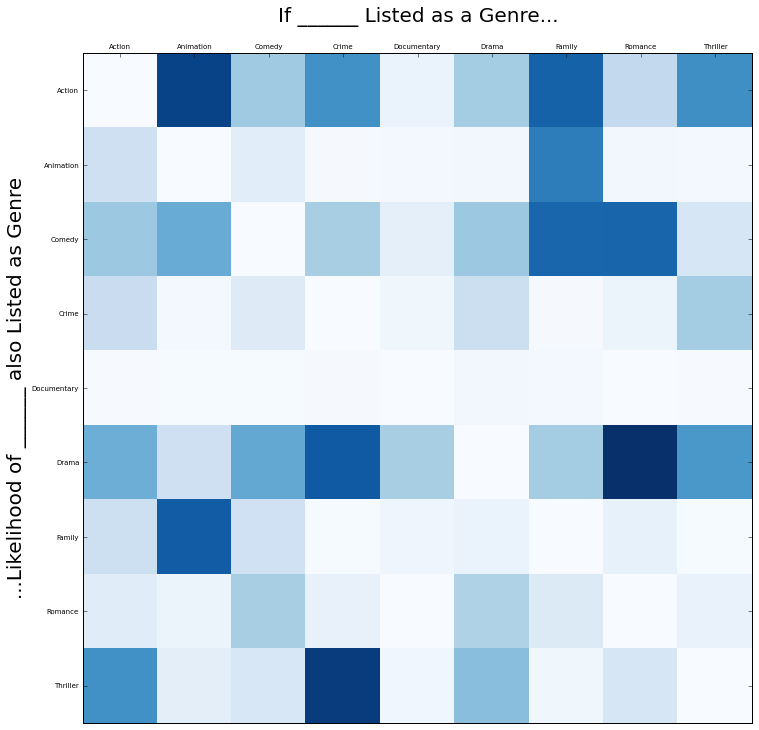

In [45]:
plot_heat_map(genre_id_table, norm_genre_pairs_revised)

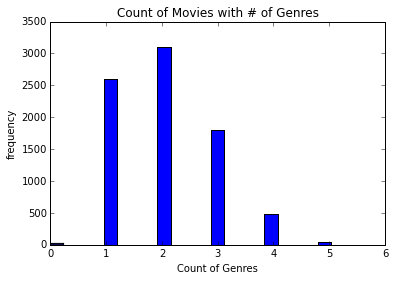

In [46]:
plt.hist(movies_genres['num_genres'].values, 
     25)
plt.title('Count of Movies with # of Genres')
plt.xlabel('Count of Genres')
plt.ylabel('frequency')

### Get Unique Genre Combos

In [47]:
np_empty = np.empty((len(movies_genres),2))
np_empty[:] = np.nan

In [48]:
genres_list_df = pd.DataFrame(np_empty, columns=['movie_id', 'genres_list'])
genres_list_df.shape

(8060, 2)

In [49]:
genres_list_df = genres_list_df.astype(object)

In [50]:
genres_list_df

,movie_id,genres_list
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [51]:
genres_as_list = list()

for i in range(0, len(movies_genres)):
    num_genres = movies_genres.iloc[i, 1]
    genres_list = list(movies_genres.iloc[i, 2:(2 + num_genres)])
    genres_list.sort()
    genres_as_list.append(genres_list)
    
    genres_list_df.iloc[i, 0] = movies_genres.iloc[i, 0]
    genres_list_df.iloc[i, 1] = genres_list
    
unique_genres_list = [list(x) for x in set(tuple(x) for x in genres_as_list)] # from stack overflow...

In [52]:
genres_list_df

,movie_id,genres_list
0,293660,"[28, 35, 10749]"
1,297761,"[28, 80]"
2,209112,[28]
3,271110,[28]
4,329865,"[18, 28, 53]"
5,284052,[28]
6,246655,[28]
7,269149,"[16, 28, 35, 10751]"
8,259316,[28]
9,330459,"[18, 28]"


In [53]:
unique_genres_df = pd.DataFrame(columns=['genre_labels', 'num_movies'])

unique_genres_df.loc[:, 'genre_labels'] = unique_genres_list
unique_genres_df.loc[:, 'num_movies'] = 0

In [54]:
for i in range(0, len(unique_genres_df)):
    unique_genres_df.iloc[i, 1] = genres_as_list.count(unique_genres_df.iloc[i, 0])

In [66]:
unique_genres_df
unique_genres_df.to_csv('unique_genre_tuple_frequencies_TMDb.csv', index=False)
print unique_genres_df.shape

(149, 2)


In [59]:
unique_genres_sorted = unique_genres_df.sort_values('num_movies', ascending=False)
unique_genres_sorted.reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'sort_values'

In [65]:
len(unique_genres_sorted)

NameError: name 'unique_genres_sorted' is not defined

In [ ]:
sum(unique_genres_sorted.iloc[:, 1])  # check we have all the movies

### Reduce Number of Genre Pairs

In [61]:
cutoff_threshold_pct = 0.01
cutoff_threshold_num = int(cutoff_threshold_pct * sum(unique_genres_sorted.iloc[:, 1]))
cutoff_row = 0

for i in range(0, len(unique_genres_sorted)):
    if unique_genres_sorted.iloc[i, 1] > cutoff_threshold_num:
        cutoff_row = cutoff_row + 1

In [62]:
cutoff_threshold_num

80

In [63]:
cutoff_row

23

In [64]:
sum(unique_genres_sorted.iloc[cutoff_row:, 1])

1610

In [65]:
selected_genre_pairs = unique_genres_sorted.iloc[:cutoff_row, :]
selected_genre_pairs = selected_genre_pairs.reset_index(drop=True)
selected_genre_pairs

,genre_labels,num_movies
0,[18],829
1,[35],683
2,[53],601
3,"[28, 53]",508
4,"[18, 35]",419
5,"[18, 53]",392
6,"[18, 10749]",324
7,"[18, 35, 10749]",298
8,[28],267
9,"[18, 28]",266


In [64]:
selected_genre_pairs

NameError: name 'selected_genre_pairs' is not defined

### Revised Overall Dataset to Reflect Reduced Genre Pairs

In [67]:
row_ref = 0

y_labels = genres_list_df.copy()

for i in range(0, len(genres_list_df)):
    
    for j in range(0, len(selected_genre_pairs)):
        
        if (genres_list_df.iloc[i, 1] == selected_genre_pairs.iloc[j, 0]):
            
            y_labels.iloc[row_ref, :] = genres_list_df.iloc[i, :]
            row_ref = row_ref + 1
            
y_labels = y_labels.iloc[:row_ref, :]

In [68]:
y_labels

,movie_id,genres_list
0,209112,[28]
1,271110,[28]
2,329865,"[18, 28, 53]"
3,284052,[28]
4,246655,[28]
5,269149,"[16, 28, 35, 10751]"
6,259316,[28]
7,330459,"[18, 28]"
8,127380,"[16, 28, 35, 10751]"
9,328111,"[16, 28, 35, 10751]"


In [69]:
len(y_labels)

6450

In [70]:
sum(selected_genre_pairs.iloc[:, 1])

6450

In [71]:
y_labels.to_csv('y_labels.csv', index=False)

In [72]:
y_labels_check = pd.read_csv('y_labels.csv')
y_labels_check

,movie_id,genres_list
0,209112,[28]
1,271110,[28]
2,329865,"[18, 28, 53]"
3,284052,[28]
4,246655,[28]
5,269149,"[16, 28, 35, 10751]"
6,259316,[28]
7,330459,"[18, 28]"
8,127380,"[16, 28, 35, 10751]"
9,328111,"[16, 28, 35, 10751]"
